# Supervised Algorithms

## 1. K-NN

In [11]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [2]:
np.random.seed(0)
indices = np.random.permutation(iris.data.shape[0])

In [3]:
XTrain = iris.data[indices[:-20]]
YTrain = iris.target[indices[:-20]]
XTest = iris.data[indices[-20:]]
YTest = iris.target[indices[-20:]]

In [4]:
# Fit and classify using K Nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(XTrain, YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [5]:
knn.predict(XTest)

array([2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [6]:
YTest

array([2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [7]:
# Counts the number of matched elements
np.count_nonzero(knn.predict(XTest)==YTest)

18

# Linear Regression

In [9]:
diabetes = datasets.load_diabetes()
XtrainDia = diabetes.data[:-20]
YtrainDia = diabetes.target[:-20]
XtestDia = diabetes.data[-20:]
YtestDia = diabetes.target[-20:]

In [10]:
from sklearn import linear_model
lin = linear_model.LinearRegression()
lin.fit(XtrainDia, YtrainDia)
print(lin.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [11]:
np.mean(lin.predict(XtestDia) - YtestDia )**2

194.35657928442458

In [12]:
lin.score(XtestDia, YtestDia) #coefficient of determination

0.5850753022690571

# NN Regression

In [17]:
from sklearn import neighbors
import matplotlib.pyplot as plt
import numpy as np

[196.8 203.8 141.4 106.  227.8 126.2 288.6  91.2 134.4 137.2 231.4  87.6
 121.8 132.   84.2 156.  123.4  93.8 173.2  91.2]
[196.76170244 204.7530405  141.3722647  105.36512053 211.57065275
 128.60506276 288.30526596  86.33127395 139.32741634 143.89506243
 232.08370638  87.75484826 120.05904435 129.60257491  82.4642721
 163.67246116 124.1046922   95.10924624 171.34941873  90.93057654]


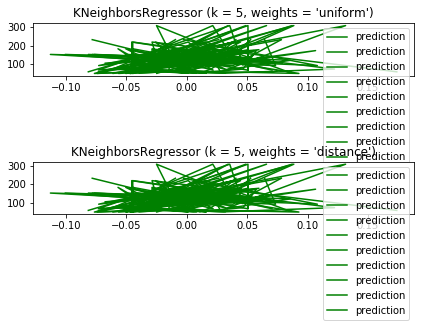

In [25]:
n_neighbors = 5
for i, weights in enumerate(['uniform','distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(XtrainDia,YtrainDia)
    print(knn.predict(XtestDia))
    plt.subplot(2,1,i+1)
    #plt.scatter(XtrainDia, YtrainDia, c='k', label='data')
    plt.plot(XtestDia, YtestDia, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

# KNN Classifier on mnist

In [1]:
import sklearn
sklearn.__version__


'0.20.3'

In [2]:
# import gzip
# f = gzip.open('data/mnist/train-images-idx3-ubyte.gz','rb')
# data = f.read()
# type(data)

In [3]:
from sklearn.datasets import fetch_openml
X,Y = fetch_openml('mnist_784',return_X_y=True)

In [4]:
X.shape
#Y.shape

(70000, 784)

In [5]:
trainX = X[:6000,:]
testX = X[-1000:,:]
trainY = Y[:6000]
testY = Y[-1000:]

In [6]:
print (trainX.shape, trainY.shape, testX.shape, testY.shape)

(6000, 784) (6000,) (1000, 784) (1000,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [8]:
knn.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
np.count_nonzero(knn.predict(testX) == testY)/len(testY)

0.945